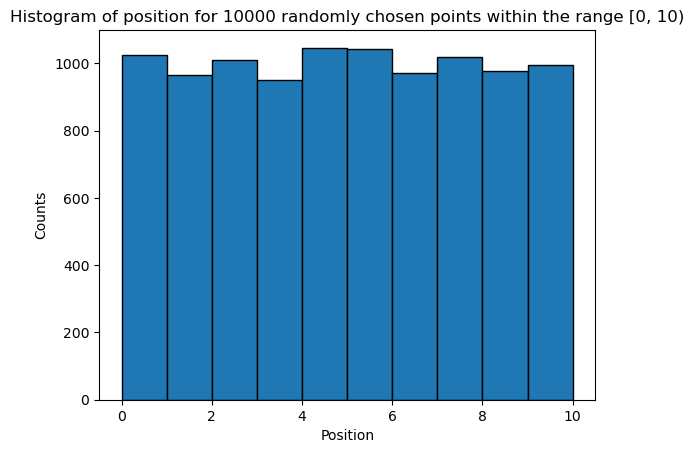

In [1]:
# 1.1 Problems, #1

import numpy as np
import matplotlib.pyplot as plt
import math

# set L
L = 10

# generate random numbers in the range [0, L)
random_numbers = np.random.uniform(0, L, size=10000)

# create and plot histogram
plt.hist(random_numbers, bins=10, edgecolor='black')
plt.title('Histogram of position for 10000 randomly chosen points within the range [0, 10)')
plt.xlabel('Position')
plt.ylabel('Counts')
plt.show()

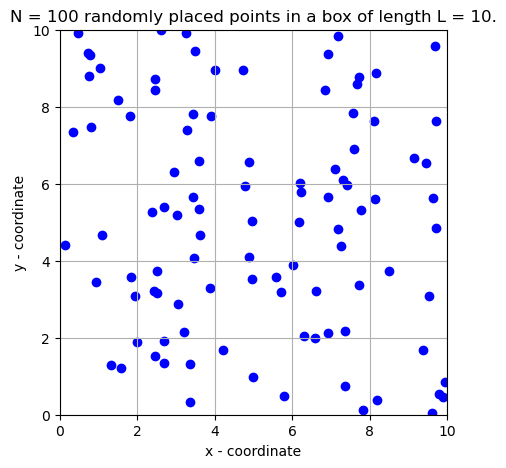

In [2]:
# 1.1 Problems, #2

def place_objects(N, L):
    """
    randomly place N objects in a square box of length L 
    returns array of coordinates of placed objects
    """
    coordinates = np.random.uniform(0, L, size=(N, 2))
    return coordinates

N = 100
L = 10
object_coordinates = place_objects(N, L)

# plot
plt.figure(figsize=(5, 5))
plt.scatter(object_coordinates[:, 0], object_coordinates[:, 1], c='blue', marker='o')
plt.xlim(0, L)
plt.ylim(0, L)
plt.title(f'N = {N} randomly placed points in a box of length L = {L}.')
plt.xlabel('x - coordinate')
plt.ylabel('y - coordinate')
plt.grid(True)
plt.show()

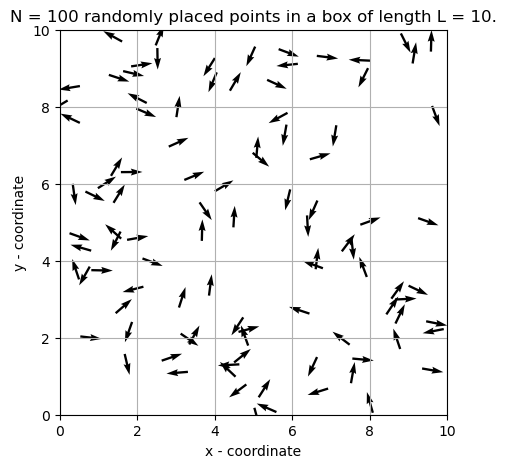

In [3]:
# 1.1 Problems, #3

def initialize(N, L):
    x = np.random.uniform(0, L, N)
    y = np.random.uniform(0, L, N)
    theta = np.random.uniform(-math.pi, math.pi, N)
    
    return x, y, theta

N = 100  
L = 10
x, y, theta = initialize(N, L)

plt.figure(figsize=(5, 5))
plt.quiver(x, y, np.cos(theta), np.sin(theta))
plt.xlim(0, L)
plt.ylim(0, L)
plt.title(f'N = {N} randomly placed points in a box of length L = {L}.')
plt.xlabel('x - coordinate')
plt.ylabel('y - coordinate')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


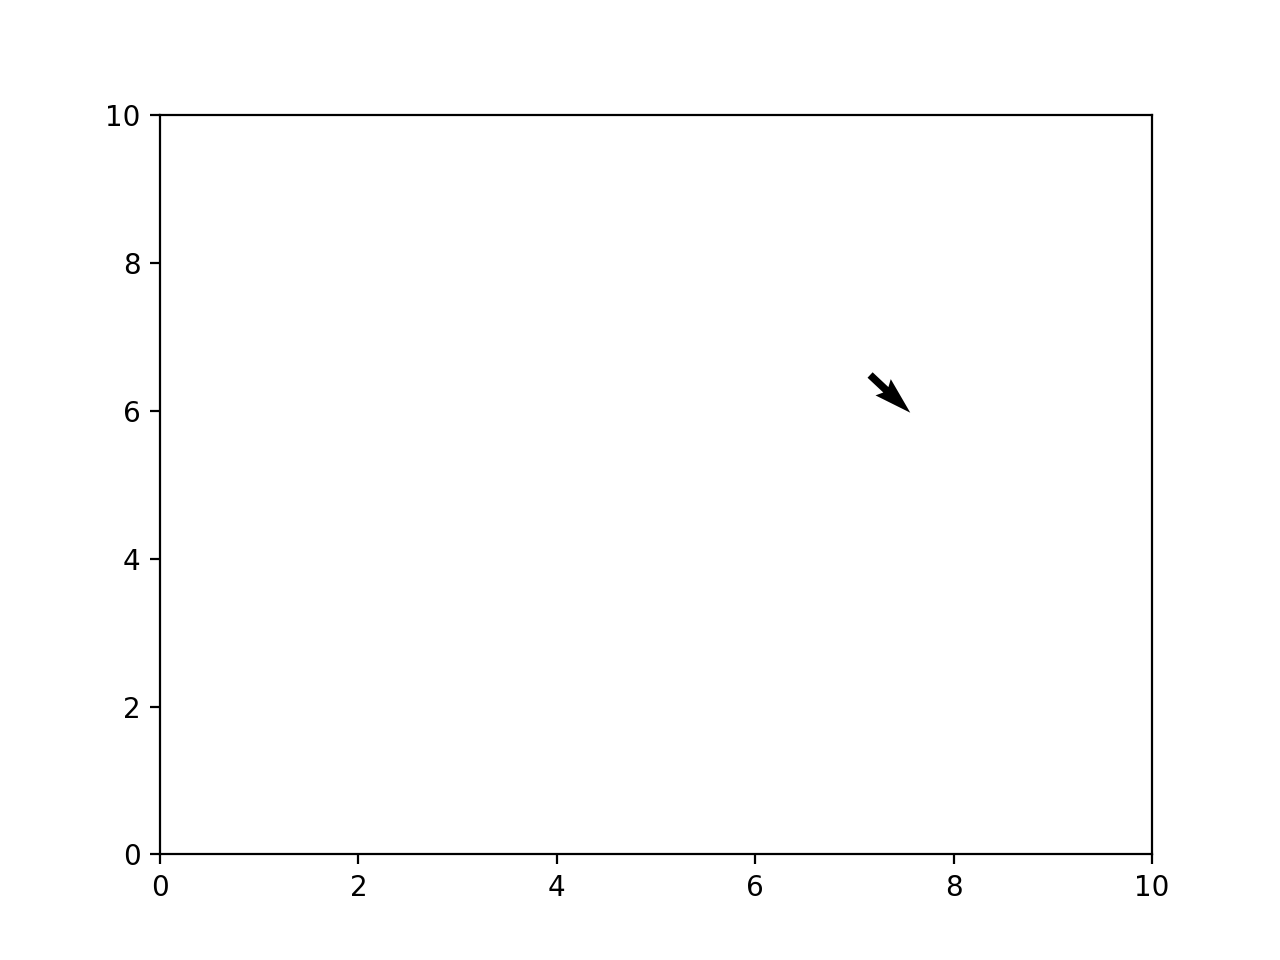

In [4]:
# 1.2 Problems, #1

%matplotlib notebook # need this for animation
from matplotlib.animation import FuncAnimation

# update the position with periodic boundaries
def update_position(x, y, theta, v, delta_t, L):
    x_new = (x + v * np.cos(theta) * delta_t) % L
    y_new = (y + v * np.sin(theta) * delta_t) % L
    return x_new, y_new

# simulation parameters
L = 10
N = 1
v = 1
delta_t = 1
Nsteps = 100

x, y, theta = initialize(N, L)

fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(0, L)

# update function for the animation
def update(frame):
    global x, y, theta
    # updating particle's position
    x, y = update_position(x, y, theta, v, delta_t, L)
    
    # clear previous plot
    ax.cla()
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)

    # plotting new position
    ax.quiver(x, y, np.cos(theta), np.sin(theta), color='black')

# animation object
ani = FuncAnimation(fig, update, frames=np.arange(Nsteps), interval=500)

plt.show()

<IPython.core.display.Javascript object>


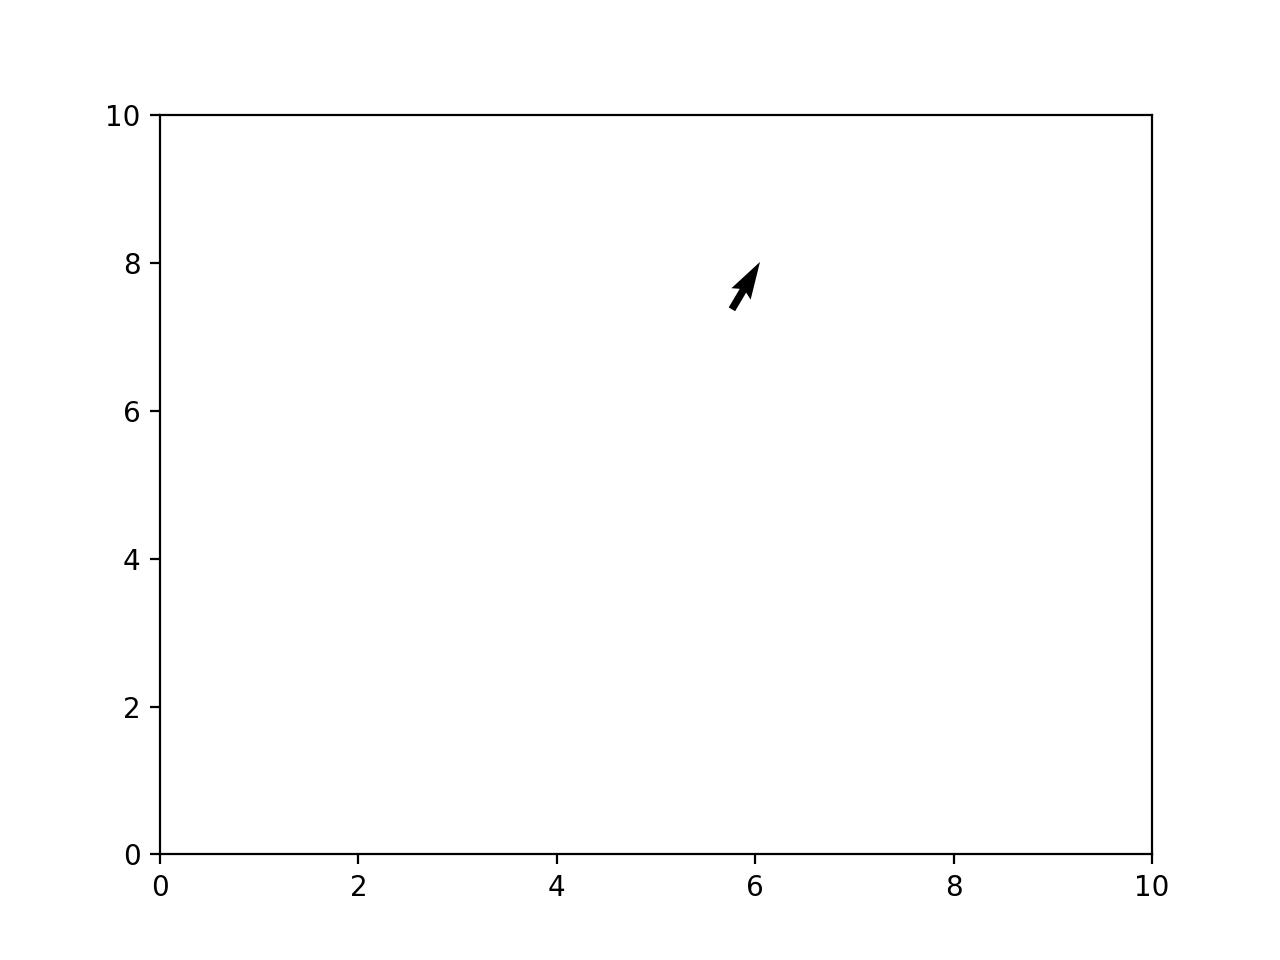

In [5]:
# 1.2 Problems, #2

def update_position_with_noise(x, y, theta, v, delta_t, L, eta):
    # update orientation with noise
    delta_theta = np.random.uniform(-eta/2, eta/2)
    theta_new = theta + delta_theta

    # update the position with periodic boundaries
    x_new = (x + v * np.cos(theta_new) * delta_t) % L
    y_new = (y + v * np.sin(theta_new) * delta_t) % L

    return x_new, y_new, theta_new

# simulation parameters
L = 10
N = 1
v = 1
delta_t = 1
Nsteps = 100
eta = 3  # angular noise

x, y, theta = initialize(N, L)

fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(0, L)

# update function for the animation
def animate(step):
    global x, y, theta
    # updating particle's position with noise
    x, y, theta = update_position_with_noise(x, y, theta, v, delta_t, L, eta)

    # clear previous plot
    ax.cla()
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    
    # plotting new position with noise
    ax.quiver(x, y, np.cos(theta), np.sin(theta), color='black')

# animation object
ani = FuncAnimation(fig, animate, frames=Nsteps, interval=500, repeat=False)

plt.show()

<IPython.core.display.Javascript object>


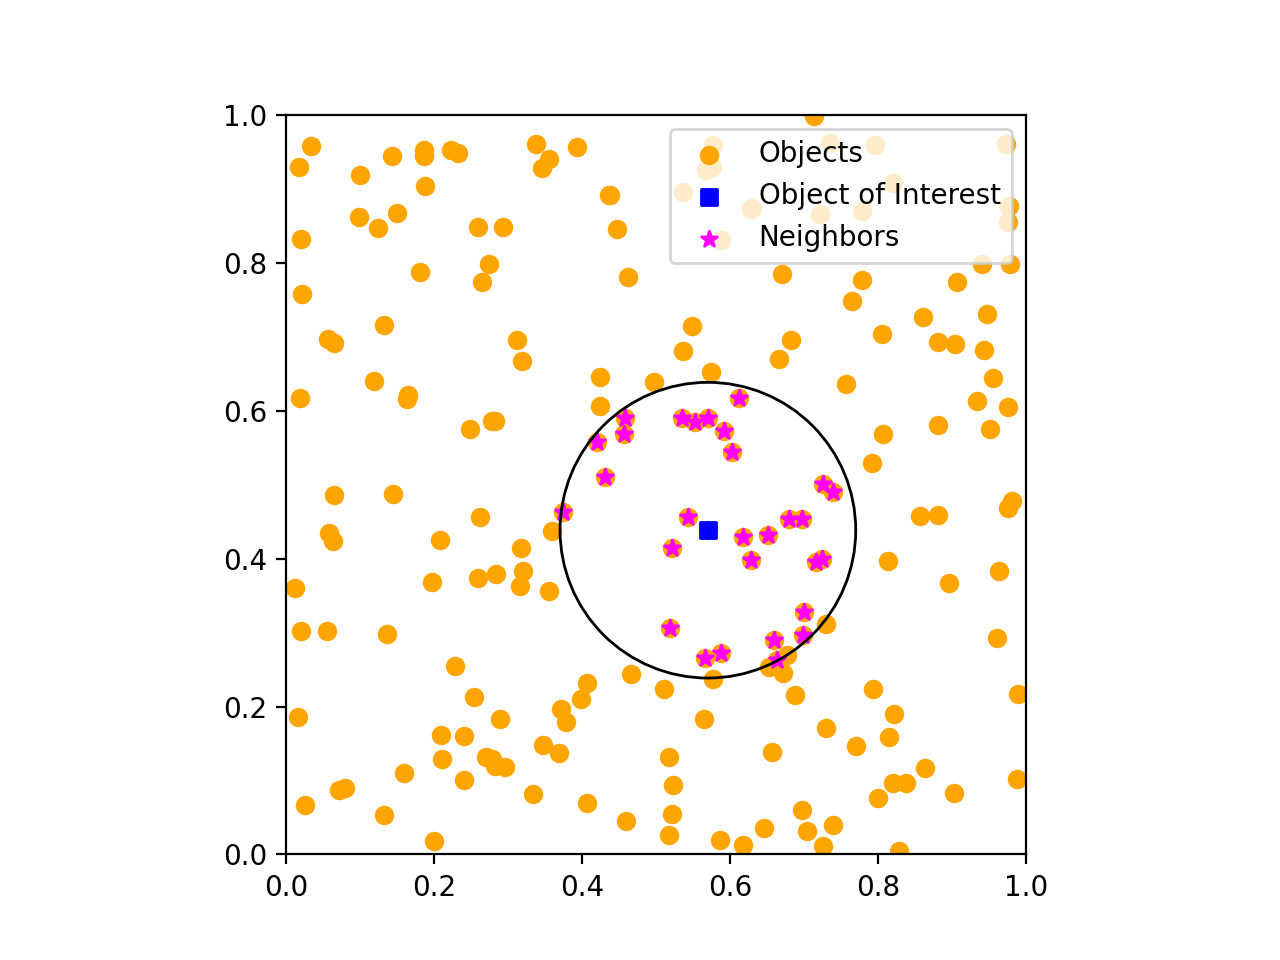

In [13]:
# 2 Problems, #1

def find_neighbors(positions, target_index, L, r0):
    """
    Finds the neighbors of an object within a radius r0 in a periodic box.
    
    Parameters:
    positions (np.array): An array of positions of all objects.
    target_index (int): The index of the target object in the positions array.
    L (float): The length of the sides of the square box (assuming a square box for simplicity).
    r0 (float): The radius within which to search for neighbors.
    
    Returns:
    neighbors (list): A list of indices of the neighboring objects.
    """
    target_position = positions[target_index]
    neighbors = []
    
    for i, position in enumerate(positions):
        if i != target_index:
            # calculate the distance considering periodic boundaries
            dx = position[0] - target_position[0]
            dy = position[1] - target_position[1]
            dx = dx - L * np.round(dx / L)
            dy = dy - L * np.round(dy / L)
            distance = np.sqrt(dx**2 + dy**2)
            
            # check if the object is within the radius r0
            if distance < r0:
                neighbors.append(i)
                
    return neighbors

# box length and radius for neighbor search
L = 1.0
r0 = 0.2

# generate random positions for a set of objects
np.random.seed(0) 
positions = np.random.uniform(0, L, (200, 2))

# choose object
object_of_interest_index = 25
object_of_interest = positions[object_of_interest_index]

# find neighbors
neighbors_indices = find_neighbors(positions, object_of_interest_index, L, r0)

fig, ax = plt.subplots()

# plotting objects as orange circles
ax.scatter(positions[:, 0], positions[:, 1], color='orange', label='Objects')

# object of interest is blue square
ax.scatter(object_of_interest[0], object_of_interest[1], color='blue', marker='s', label='Object of Interest')

# neighbors are magenta stars
for i, neighbor_index in enumerate(neighbors_indices):
    neighbor_position = positions[neighbor_index]
    if i == 0:  # only labeling the first neighbor to avoid duplicate legend entries
        ax.scatter(neighbor_position[0], neighbor_position[1], color='magenta', marker='*', label='Neighbors')
    else:
        ax.scatter(neighbor_position[0], neighbor_position[1], color='magenta', marker='*')
        
# drawing circle around the object of interest to show the search radius
circle = plt.Circle(object_of_interest, r0, color='black', fill=False)
ax.add_artist(circle)

ax.set_xlim(0, L)
ax.set_ylim(0, L)
ax.set_aspect('equal')
ax.legend()
plt.show()

<IPython.core.display.Javascript object>


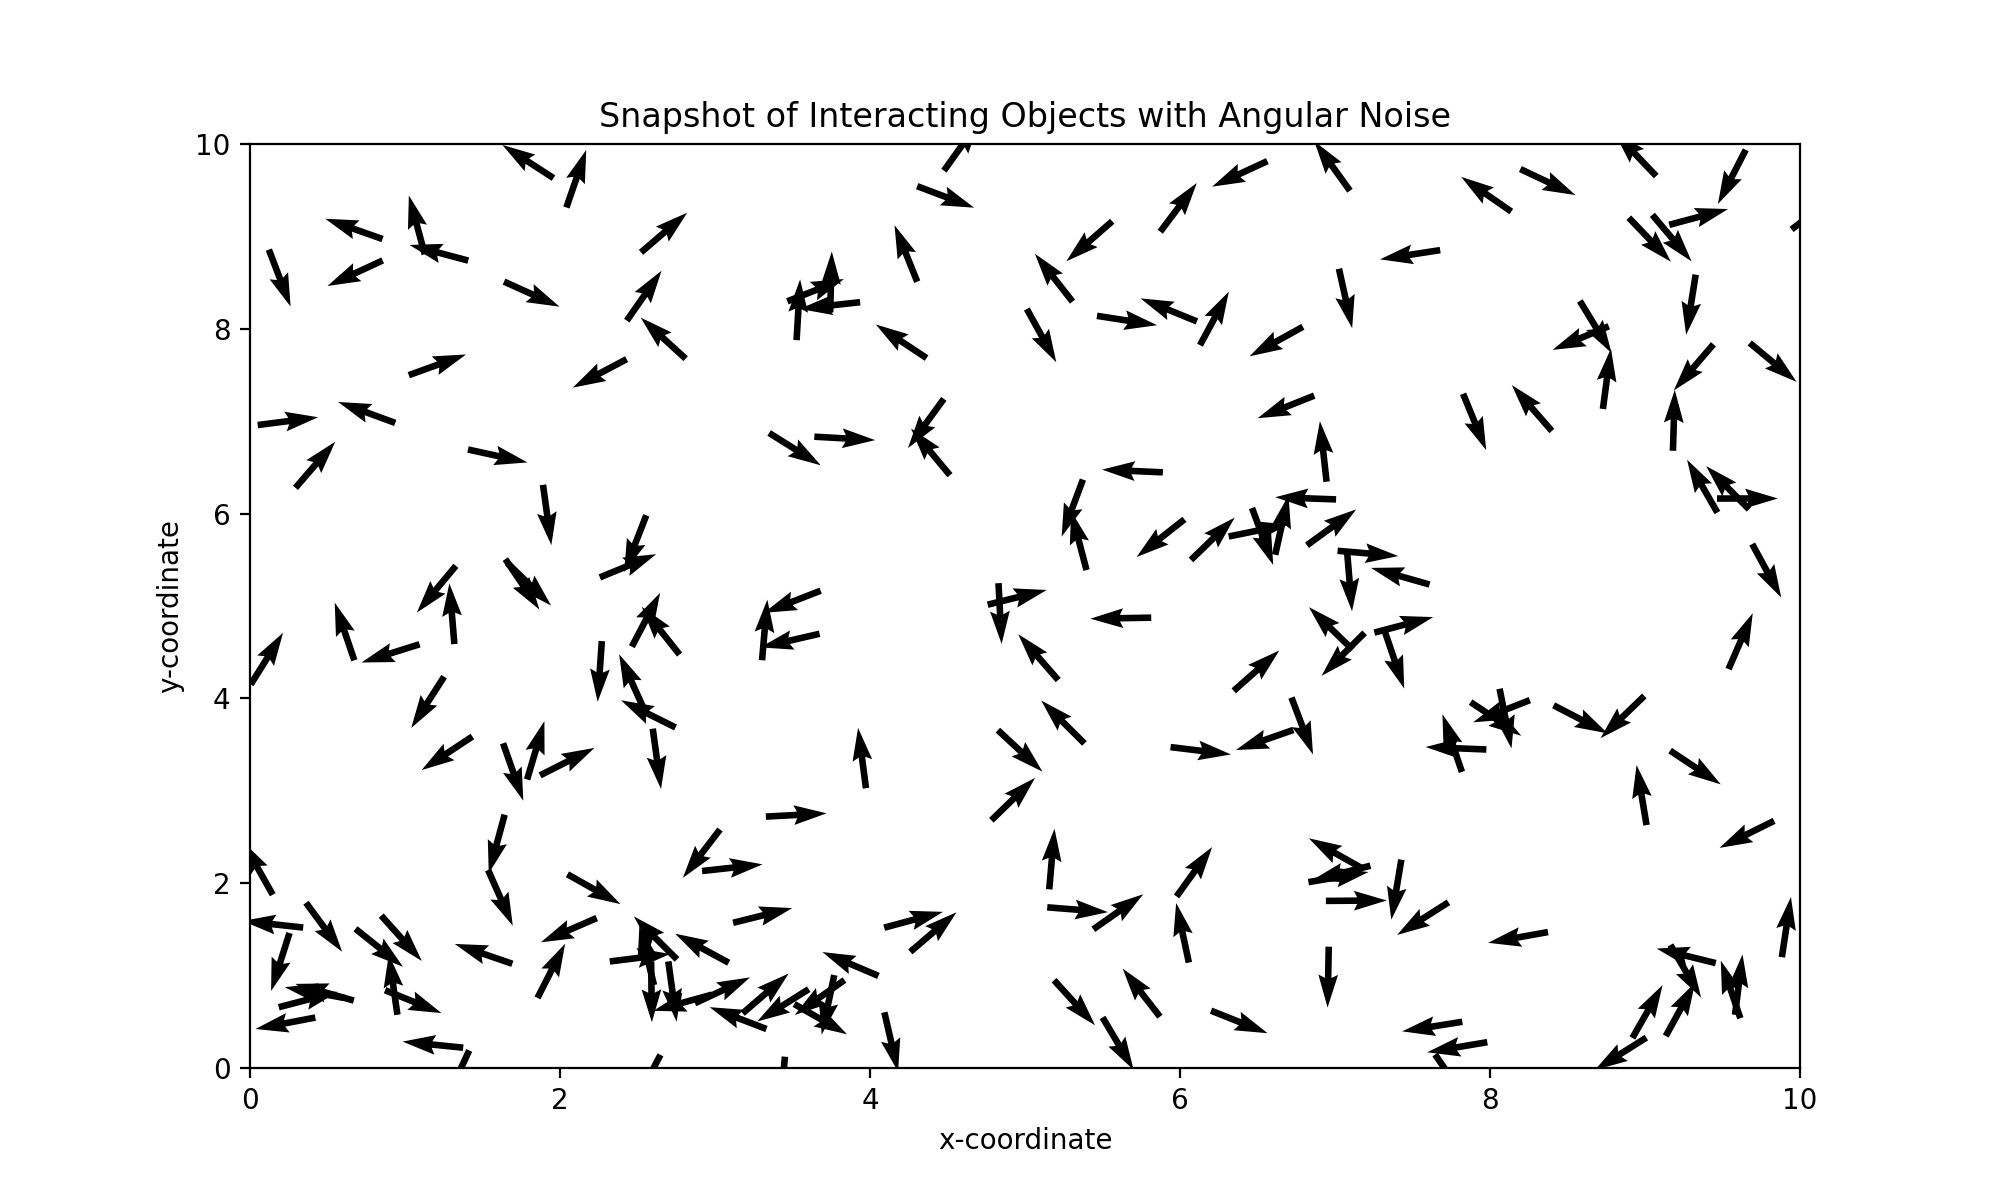

In [20]:
# 2 Problems, #2

# initialize the state of the system with random positions and orientations
def initialize_system(N, L):
    positions = np.random.uniform(0, L, (N, 2))
    orientations = np.random.uniform(-np.pi, np.pi, N)
    return positions, orientations

def align_orientation_with_neighbors(positions, orientations, L, r0, eta):
    N = len(positions)
    new_orientations = np.copy(orientations)
    
    for i in range(N):
        # find neighbors within radius r0, accounting for periodic boundary conditions
        dx = positions[:, 0] - positions[i, 0]
        dy = positions[:, 1] - positions[i, 1]
        dx = dx - L * np.round(dx / L)
        dy = dy - L * np.round(dy / L)
        distances = np.sqrt(dx**2 + dy**2)
        neighbors = (distances < r0) & (distances > 0)  # exclude self
        
        # calculate the average orientation of neighbors
        if np.any(neighbors):  # if there are any neighbors
            average_orientation = np.arctan2(np.sin(orientations[neighbors]).mean(),
                                             np.cos(orientations[neighbors]).mean())
            new_orientations[i] = average_orientation + np.random.uniform(-eta/2, eta/2)
        else:
            # if no neighbors, add random noise to orientation
            new_orientations[i] += np.random.uniform(-eta/2, eta/2)
            
    return new_orientations

# evolve the system with interactions
def evolve_system_with_interactions(positions, orientations, L, r0, eta, delta_t, time_steps):
    for _ in range(time_steps):
        # aligning orientations with neighbors
        orientations = align_orientation_with_neighbors(positions, orientations, L, r0, eta)
        
        # updating positions based on orientations
        positions[:, 0] = (positions[:, 0] + np.cos(orientations) * delta_t) % L
        positions[:, 1] = (positions[:, 1] + np.sin(orientations) * delta_t) % L
    
    return positions, orientations

# parameters
L = 10
N = 200
r0 = 2  # interaction radius
eta = 0.5  # angular noise
delta_t = 1
time_steps = 250  # number of time steps to evolve the system

# initialize and evolve the system
positions, orientations = initialize_system(N, L)
positions, orientations = evolve_system(positions, orientations, L, r0, eta, delta_t, time_steps)

# plotting a snapshot of the system
plt.figure(figsize=(10, 6))
plt.quiver(positions[:, 0], positions[:, 1], np.cos(orientations), np.sin(orientations))
plt.xlim(0, L)
plt.ylim(0, L)
plt.title('Snapshot of Interacting Objects with Angular Noise')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.show()